In [6]:
install.packages(c('ROCR','Epi'))
library(ROCR)
library(Epi)

also installing the dependencies ‘cmprsk’, ‘etm’, ‘numDeriv’, ‘data.table’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘Epi’

The following object is masked from ‘package:base’:

    merge.data.frame



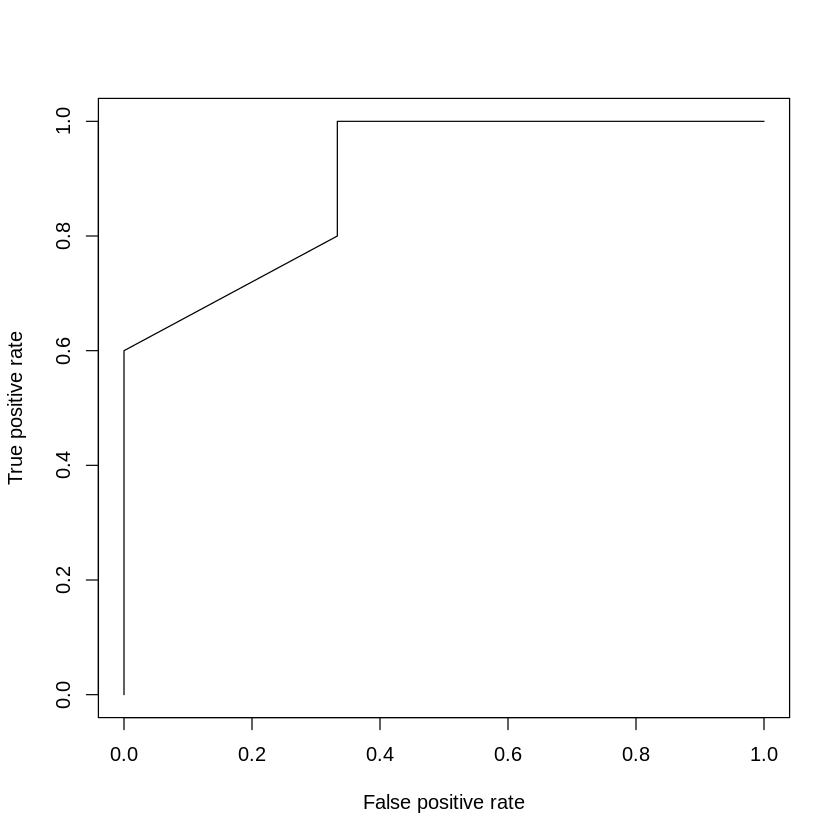

In [3]:

pred<-prediction(c(0.1,.5,.3,.8,.9,.4,.9,.5), c(0,0,0,1,1,1,1,1))
perf <- performance(pred, "tpr", "fpr")
plot(perf)

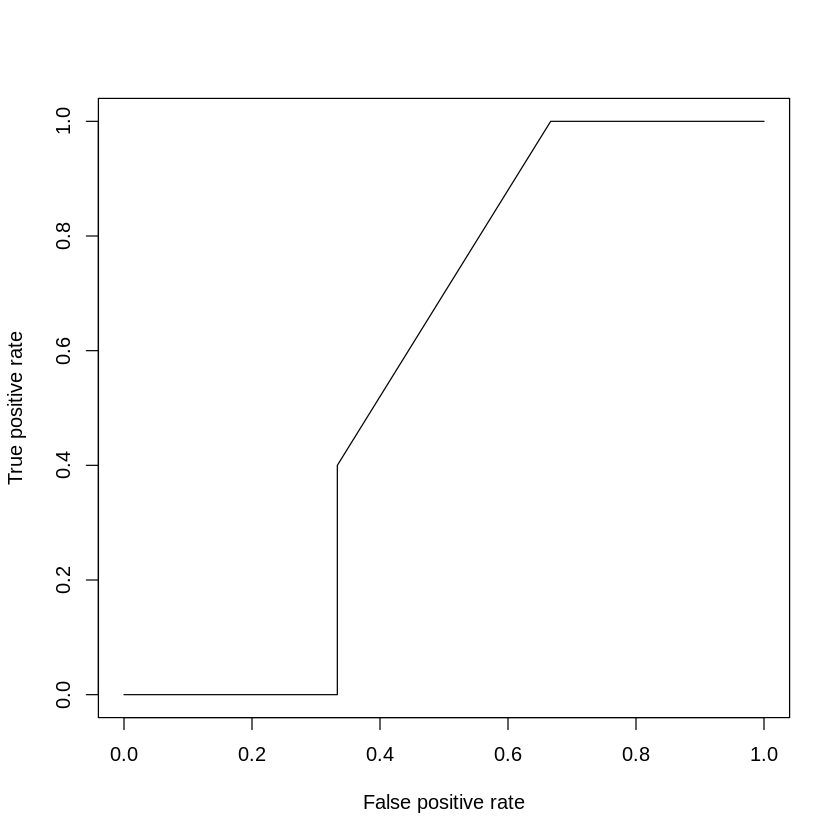

In [4]:

pred<-prediction(c(0.1,.5,.9,.8,.5,.5,.5,.7), c(0,0,0,1,1,1,1,1))
perf <- performance(pred, "tpr", "fpr")
plot(perf)


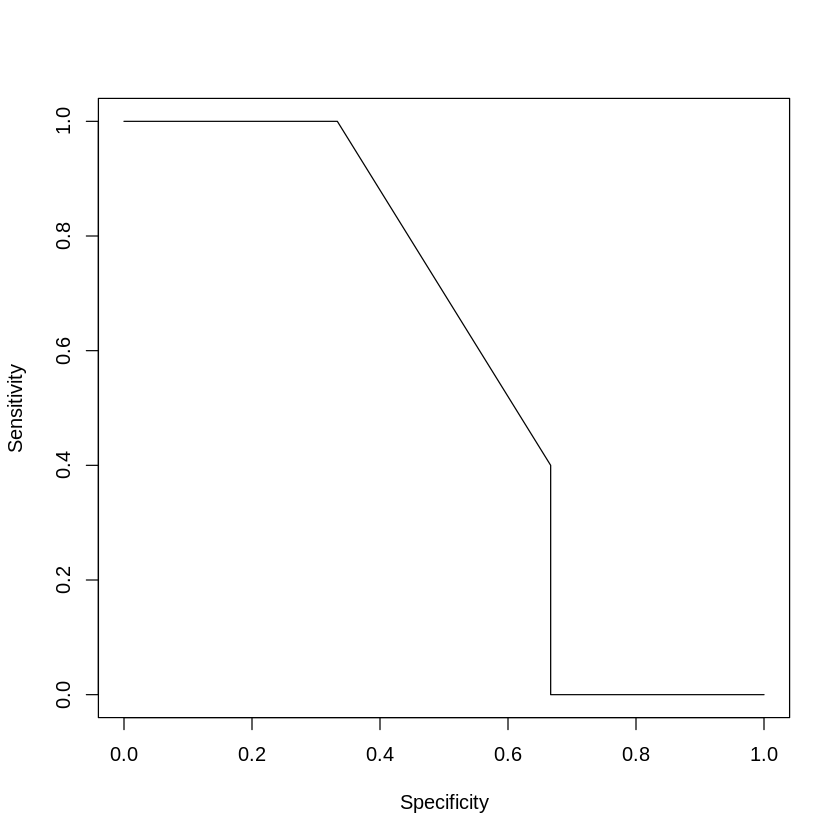

In [7]:
perf <- performance(pred, "sens", "spec")
plot(perf)

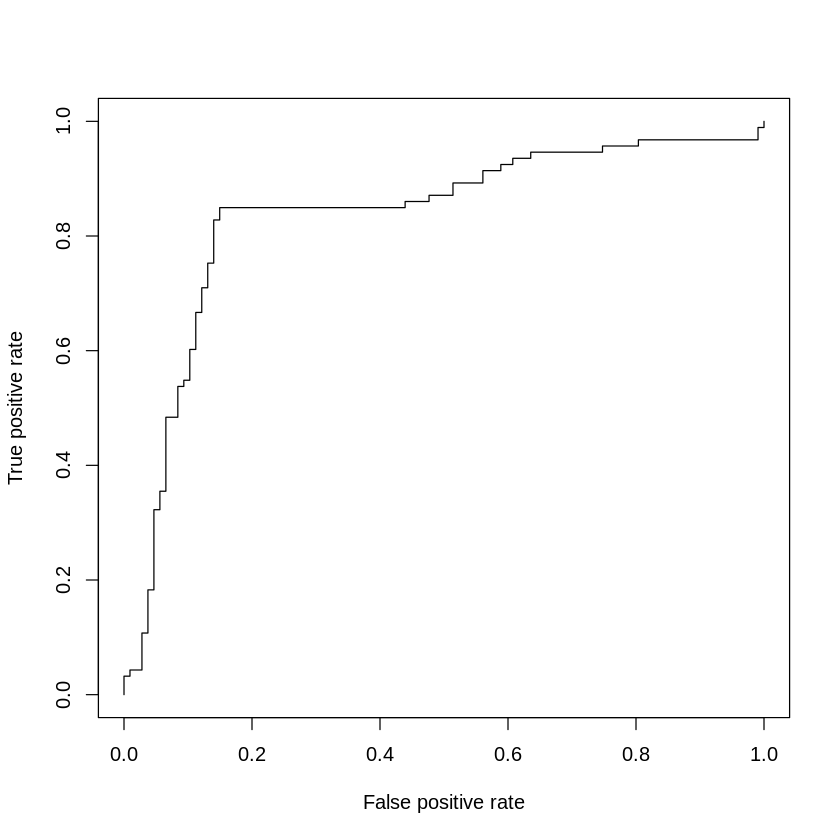

In [8]:
data(ROCR.simple)
pred <- prediction( ROCR.simple$predictions, ROCR.simple$labels)
perf <- performance(pred,"tpr","fpr")
plot(perf)

In [9]:

cutoffs <- data.frame(cut=perf@alpha.values[[1]], fpr=perf@x.values[[1]], 
                      tpr=perf@y.values[[1]])

subset(cutoffs, fpr == tpr)



,cut,fpr,tpr
1,Inf,0,0
201,0.005422562,1,1


[1] 0.5177832

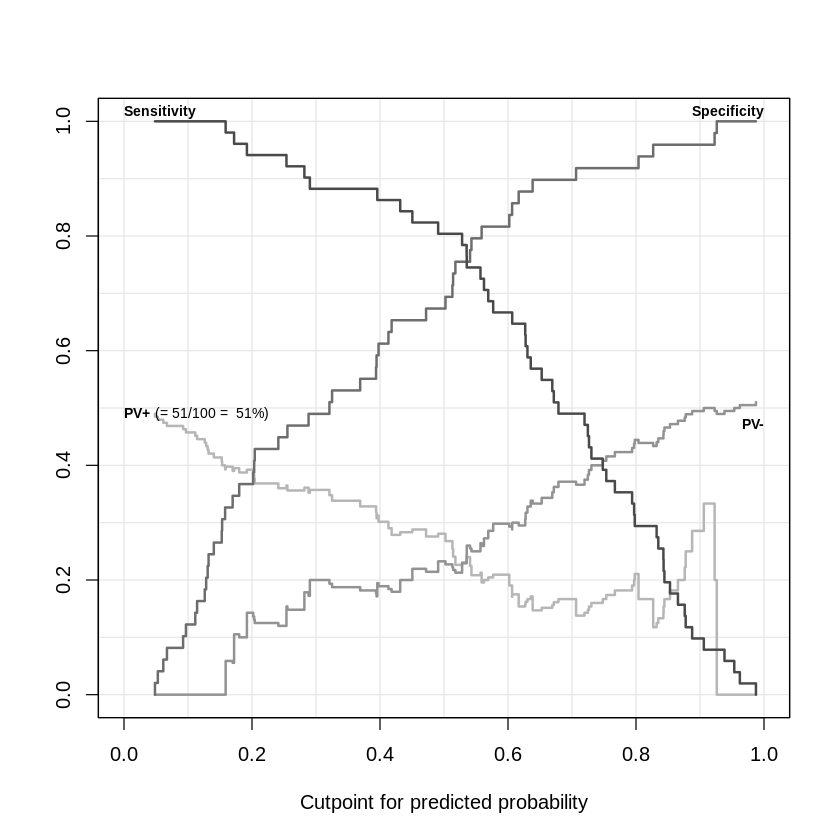

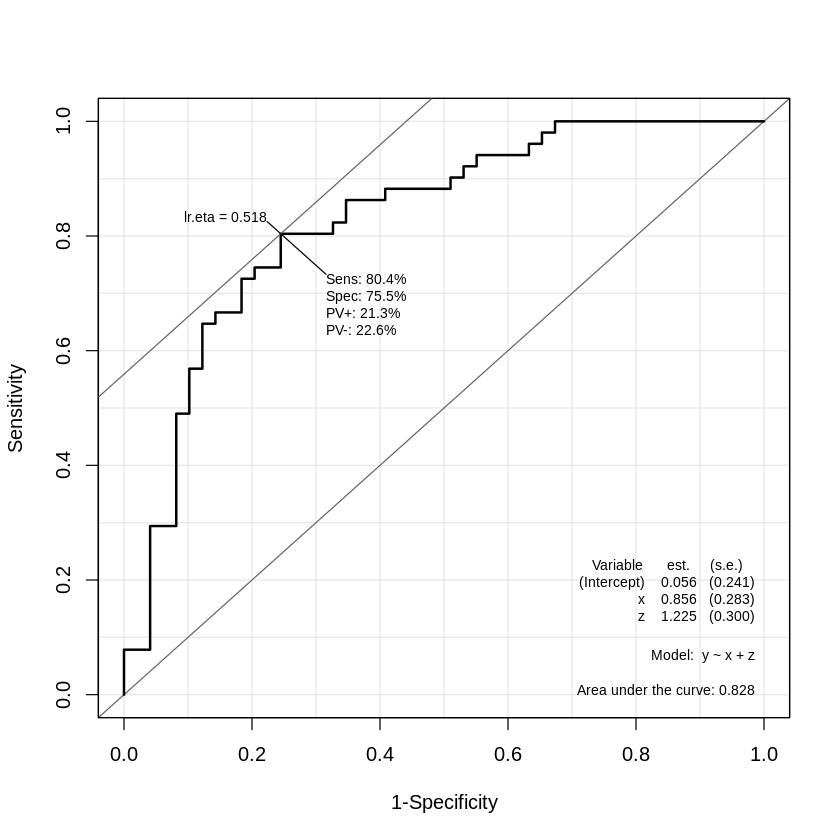

In [10]:

x <- rnorm( 100 )
z <- rnorm( 100 )
w <- rnorm( 100 )
tigol <- function( x ) 1 - ( 1 + exp( x ) )^(-1)
y <- rbinom( 100, 1, tigol( 0.3 + 3*x + 5*z + 7*w ) )
rc <- ROC( form = y ~ x + z, plot="sp" ) 
## optimal combination
opt <- which.max(rowSums(rc$res[, c("sens", "spec")]))
## optimal cut-off point 
rc$res$lr.eta[opt]

ROC(form = y ~ x + z, plot = "ROC", MX = TRUE)